## Project Goal

The goal of this predictive modeling project is to evaluate and predict the effectiveness of marketing campaigns by identifying key factors influencing customer responses. Using a Random Forest Classifier, the model aims to:

1. Accurately classify customers into responders and non-responders.
2. Identify the most important features driving campaign effectiveness.
3. Provide actionable insights for targeted marketing strategies to maximize engagement and conversion rates.

## Libraries

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

In [ ]:
#Mount Google Drive
drive.mount('/content/drive')

#Define the file path
file_path = '/content/drive/My Drive/marketing_campaign.csv'

#Load the dataset
df = pd.read_csv(file_path, delimiter='\t')
print(df.head())

Mounted at /content/drive
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  C

## RandomForestClassifier

Accuracy: 0.8541353383458646
ROC-AUC: 0.8200088495575221
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       565
           1       0.54      0.20      0.29       100

    accuracy                           0.85       665
   macro avg       0.71      0.58      0.61       665
weighted avg       0.82      0.85      0.82       665

Confusion Matrix:
 [[548  17]
 [ 80  20]]

Feature Importances:
                     Feature  Importance
1                    Income    0.111581
6           MntMeatProducts    0.100008
4                  MntWines    0.099220
9              MntGoldProds    0.091943
14        NumWebVisitsMonth    0.069247
12      NumCatalogPurchases    0.064210
13        NumStorePurchases    0.062798
5                 MntFruits    0.057188
0                Year_Birth    0.054245
7           MntFishProducts    0.053716
8          MntSweetProducts    0.047330
11          NumWebPurchases    0.044834
3      

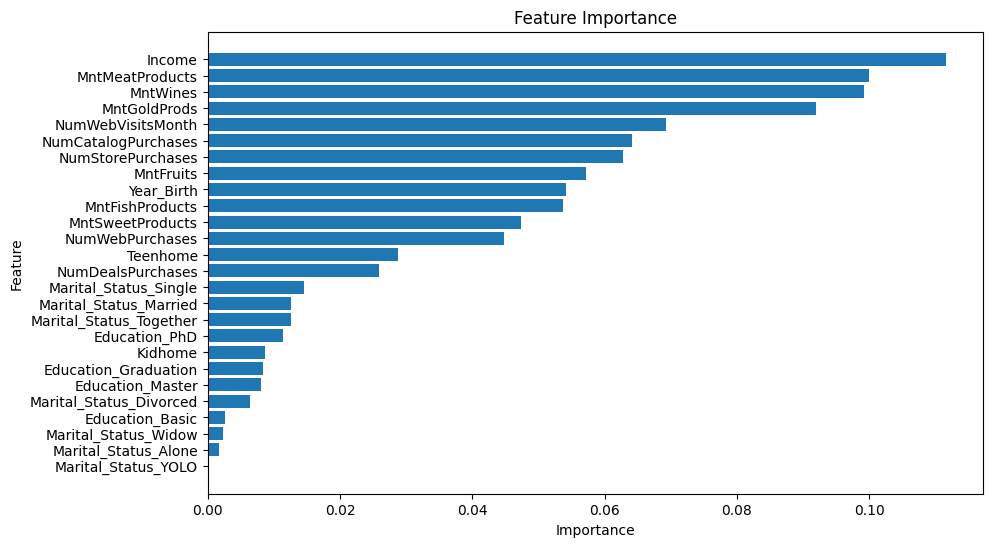

In [ ]:
# Preprocessing: Handle missing values
df = df.dropna(subset=['Income'])

# Define the target variable ('Response') and features
# Assuming 'Response' is the column indicating whether the customer responded to the campaign
features = [
    'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'
]
target = 'Response'

# Select the relevant features and target variable
df = df[features + [target]]

# Encode categorical variables
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

# Split the data into train and test sets
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, class_weight='balanced')

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance
feature_importances = pd.DataFrame(
    {'Feature': X.columns, 'Importance': clf.feature_importances_}
).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", feature_importances)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

## Interpretation of Results

### 1. Model Performance
- **Accuracy: 85.4%**
  - The model predicts correctly for about 85% of the test data.
  - High accuracy indicates that the model performs well overall but might be influenced by the class imbalance (since most customers did not respond to the campaign).

- **ROC-AUC: 82.0%**
  - This score suggests good discrimination ability between responders (1) and non-responders (0).
  - The model performs better than random guessing, with significant predictive capability for campaign response.

### 2. Classification Report
- **Class 0 (Non-Responders)**:
  - Precision: 87% — Out of all predicted non-responders, 87% were correct.
  - Recall: 97% — The model correctly identified 97% of the actual non-responders.
  - F1-Score: 92% — A good balance of precision and recall for non-responders.

- **Class 1 (Responders)**:
  - Precision: 54% — Out of all predicted responders, only 54% were correct.
  - Recall: 20% — The model identified only 20% of the actual responders.
  - F1-Score: 29% — Indicates the model struggles with the minority class (responders).

- **Macro Average**:
  - F1-Score: 61% — Indicates lower performance for the minority class, reducing overall balance.

### 3. Confusion Matrix
- **True Positives (TP)**: 20 — Correctly predicted responders.
- **True Negatives (TN)**: 548 — Correctly predicted non-responders.
- **False Positives (FP)**: 17 — Predicted as responders but were not.
- **False Negatives (FN)**: 80 — Actual responders but predicted as non-responders.

### 4. Feature Importance
- **Top Predictors for Campaign Effectiveness**:
  1. **Income (11.16%)** — Higher income strongly correlates with campaign response.
  2. **Meat Product Spending (10.00%)** — Customers spending more on meat products are likely to respond.
  3. **Wine Spending (9.92%)** — Wine spending is a key indicator of response likelihood.
  4. **Gold Product Spending (9.19%)** — Spending on luxury items correlates with campaign engagement.
  5. **Web Visits per Month (6.92%)** — Frequent website visits predict higher engagement.

### Recommendations
1. **Target High-Value Customers**:
   - Focus on customers with high income and spending on meat, wine, and gold products.
   - Use personalized offers for these segments.

2. **Improve Responders Detection**:
   - Address the imbalance issue with oversampling (e.g., SMOTE) or adjusting thresholds.
   - Consider additional features to improve precision and recall for responders.

3. **Leverage Digital Channels**:
   - Engage customers who frequently visit the website with dynamic, personalized campaigns.

4. **Enhance Product-Specific Campaigns**:
   - Create tailored campaigns targeting high spenders on wine, meat, and luxury products.
